In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [21]:
df = pd.read_csv('Banking.csv')
df.head(10)

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5
5,IND78532,Samuel Hudson,23,13204,07-02-2019,Douglas Tucker,American,Help Desk Technician,High,Silver,...,1307269.41,745627.74,238310.37,15615.18,1556031.06,1,2,1,1,6
6,IND95683,Timothy Alexander,46,42910,02-06-2002,Douglas Tucker,Asian,Account Coordinator,High,Gold,...,41200.18,60588.50,24639.33,3045.78,154111.62,1,1,1,2,7
7,IND40785,Carl Martin,78,6127,03-11-2000,Steve Diaz,European,Automation Specialist II,Mid,Gold,...,156983.13,53889.73,46813.78,51979.19,1171456.68,0,2,2,2,8
8,IND13570,Philip Day,67,32656,07-04-2015,Bruce Butler,Asian,Software Test Engineer II,High,Silver,...,1242347.22,328334.62,279528.12,27125.28,464560.28,0,1,2,2,9
9,IND53299,Jason Sims,51,28340,20-11-1995,Joe Price,European,Geologist III,Mid,Silver,...,317246.67,111532.03,115869.39,48043.52,908583.94,2,1,3,1,10


In [5]:
df.shape

(3000, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [ ]:
# Generating descriptive statistics of the dataframe
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [46]:
# Dividing into categorical data based on income 
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Med', 'High']

df['Income Band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels, right=False)

<Axes: xlabel='Income Band'>

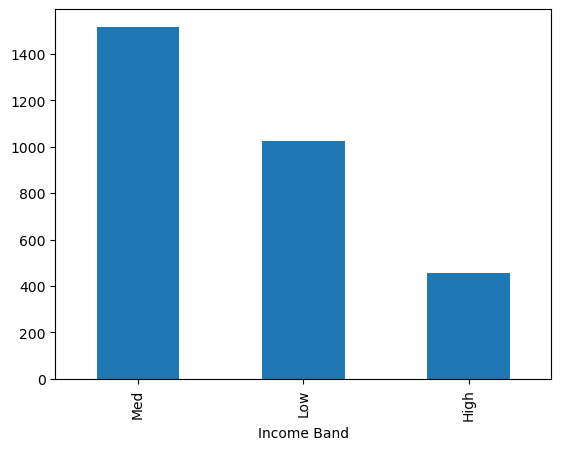

In [23]:
df['Income Band'].value_counts().plot(kind='bar')

In [17]:
# Examine the distribution of unique cataegories in categorical columns
categorical_cols = df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]].columns

for col in categorical_cols:
  print(f"Value Counts for '{col}':")
  display(df[col].value_counts())

Value Counts for 'BRId':


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

Value Counts for 'GenderId':


GenderId
2    1512
1    1488
Name: count, dtype: int64

Value Counts for 'IAId':


IAId
1     177
2     177
3     177
4     177
8     177
9     176
13    176
12    176
10    176
11    176
14    176
15    176
6      89
5      89
7      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

Value Counts for 'Amount of Credit Cards':


Amount of Credit Cards
1    1922
2     765
3     313
Name: count, dtype: int64

Value Counts for 'Nationality':


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

Value Counts for 'Occupation':


Occupation
Associate Professor             28
Structural Analysis Engineer    28
Recruiter                       25
Account Coordinator             24
Human Resources Manager         24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

Value Counts for 'Fee Structure':


Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

Value Counts for 'Loyalty Classification':


Loyalty Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

Value Counts for 'Properties Owned':


Properties Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

Value Counts for 'Risk Weighting':


Risk Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

Value Counts for 'Income Band':


Income Band
Med     1517
Low     1027
High     456
Name: count, dtype: int64

## Univariate Analysis 

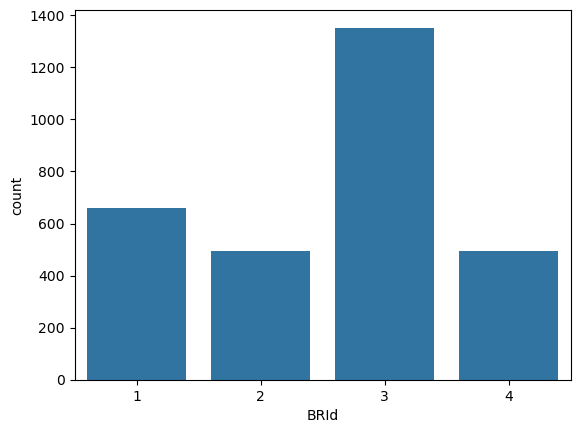

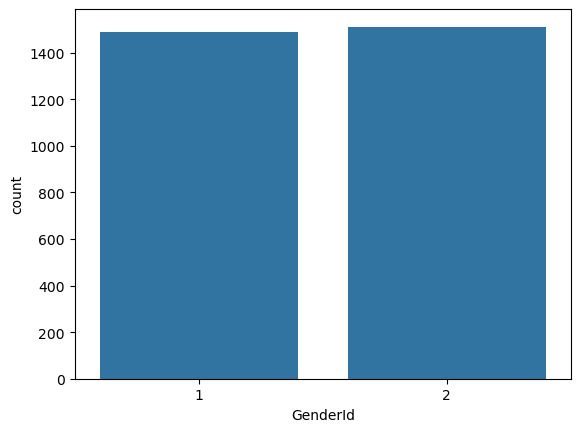

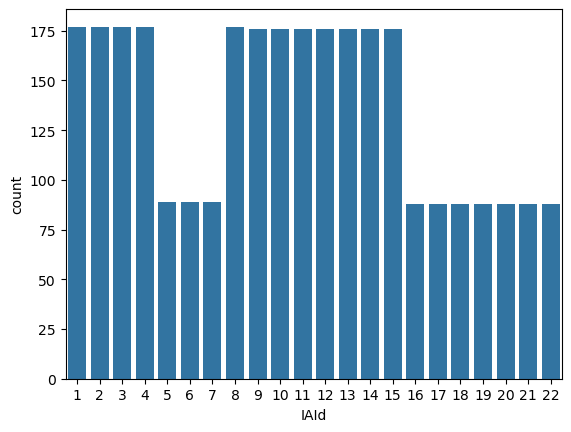

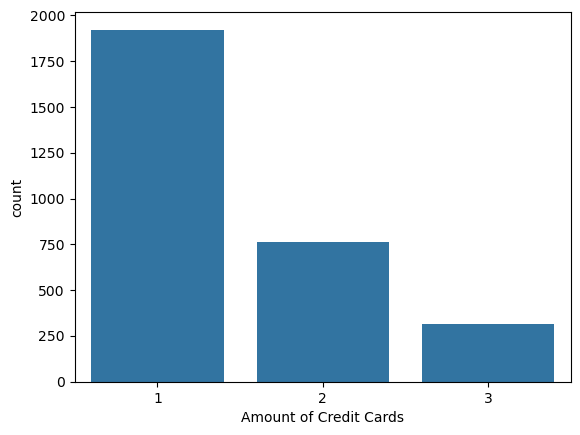

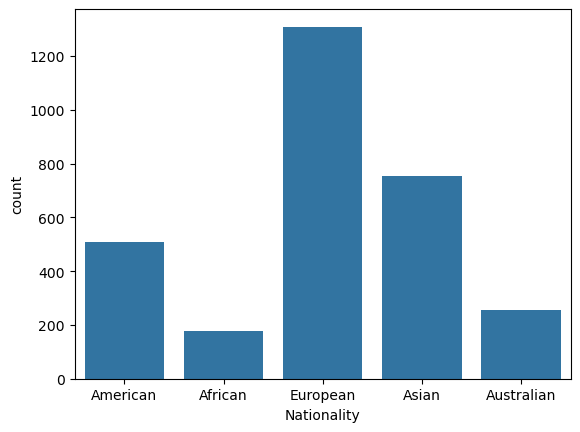

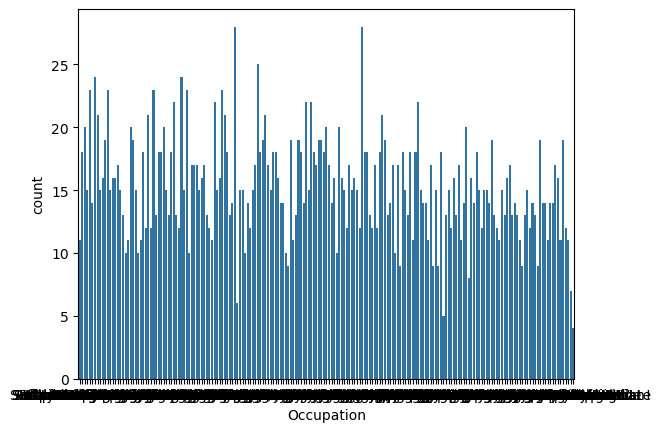

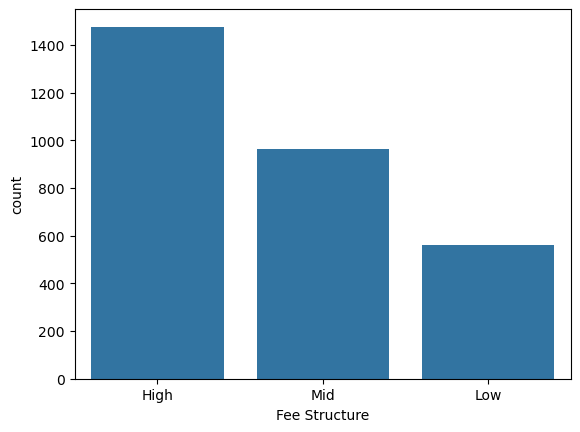

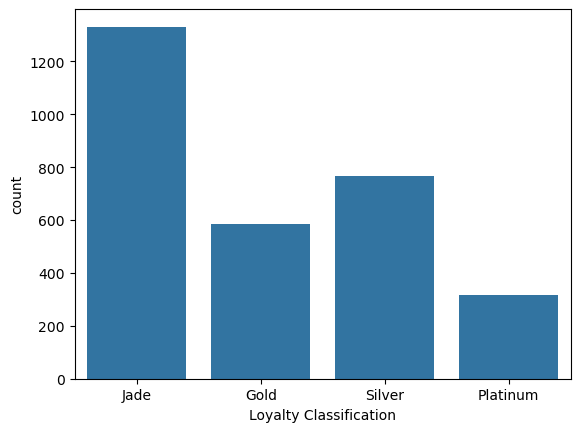

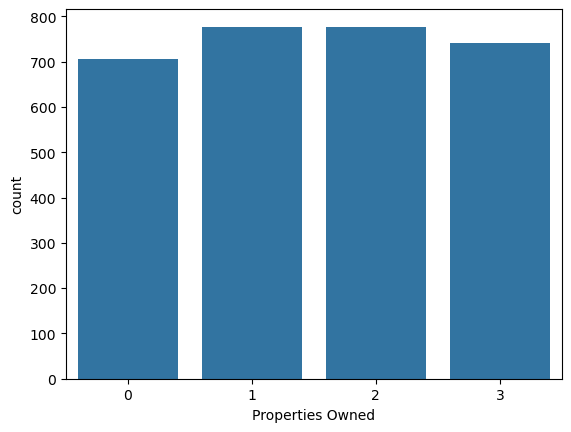

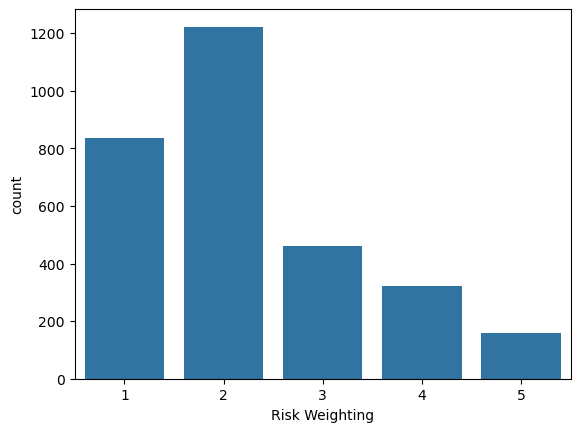

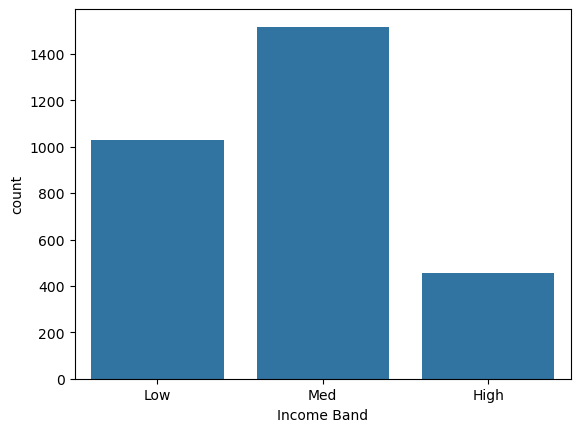

In [24]:
# analysing one column at a time
for i, predictor in enumerate(df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor)

C:\Users\ashut\AppData\Local\Temp\ipykernel_10824\922007878.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


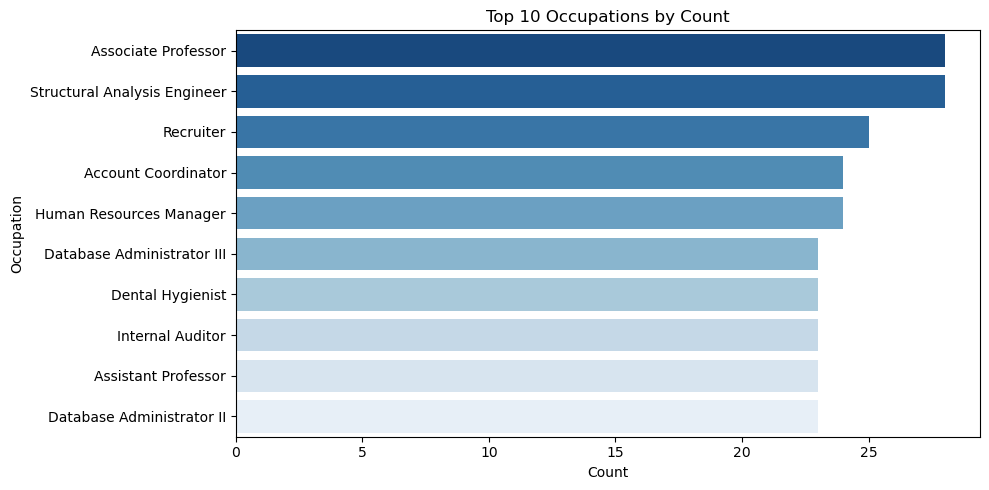

In [25]:
# TOP 10 occupations of customers
top_occupations = df['Occupation'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.countplot(
    y='Occupation',
    data=df[df['Occupation'].isin(top_occupations.index)],
    order=top_occupations.index,
    palette='Blues_r'
)
plt.title('Top 10 Occupations by Count')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()



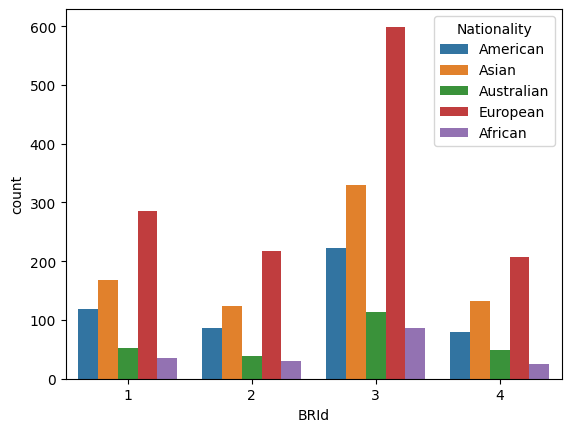

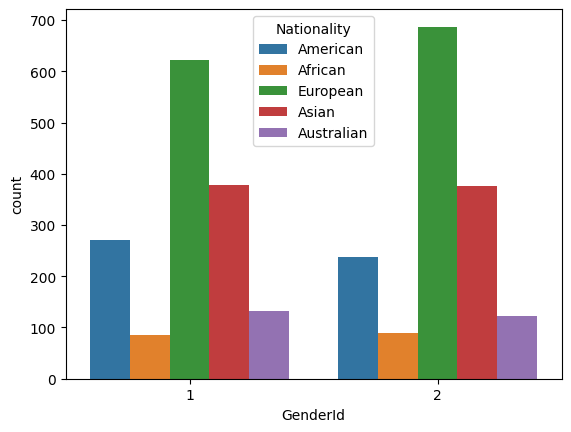

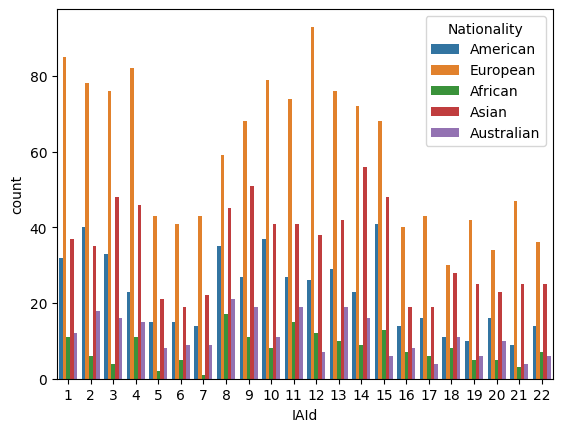

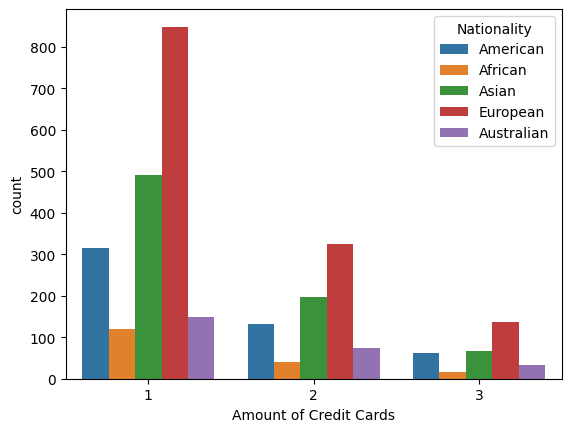

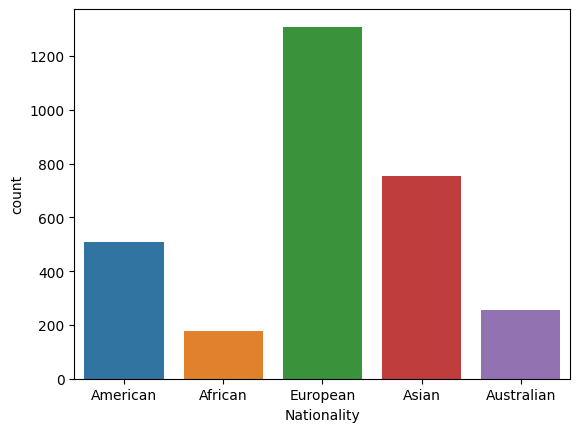

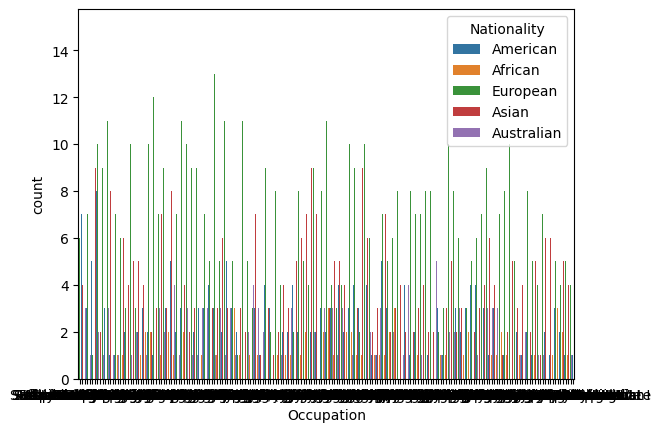

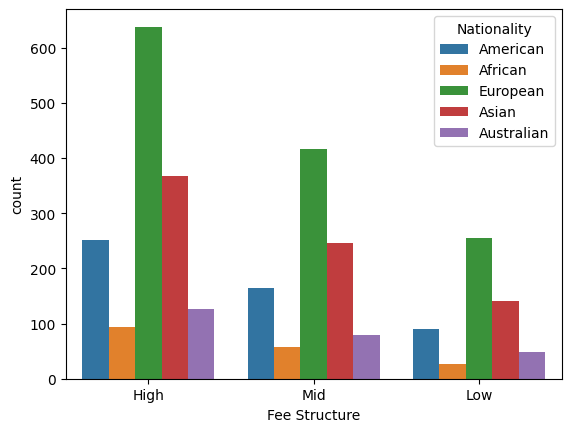

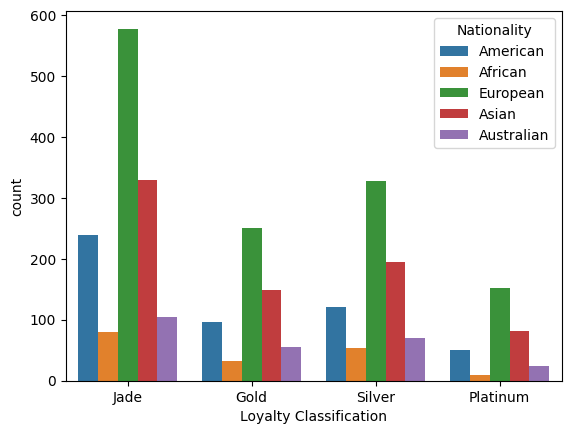

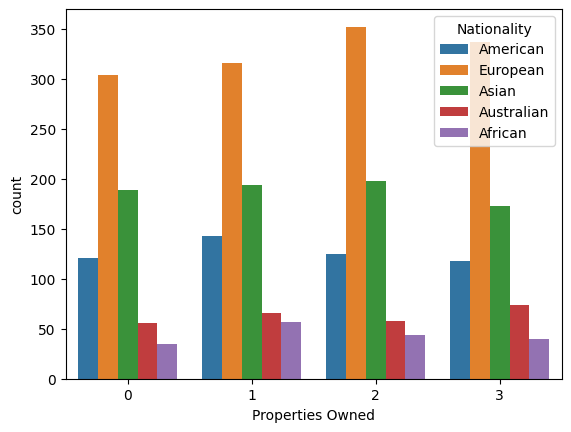

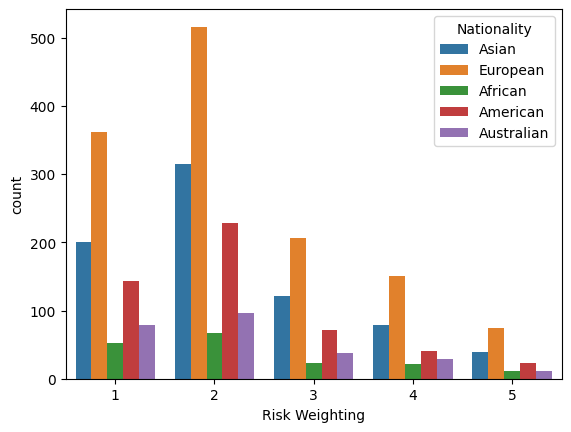

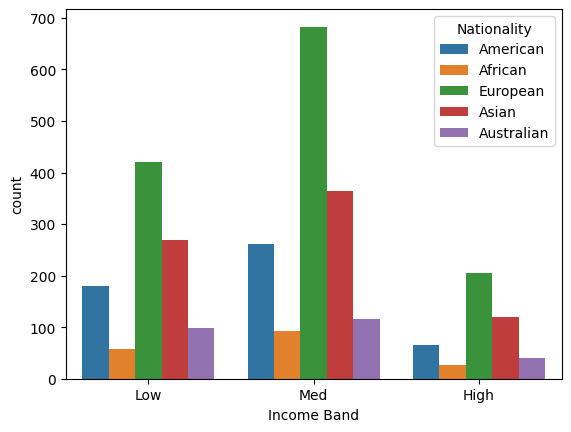

In [ ]:
# Analysing customers based on their nationality
for i, predictor in enumerate(df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Nationality')

## Numerical Analysis

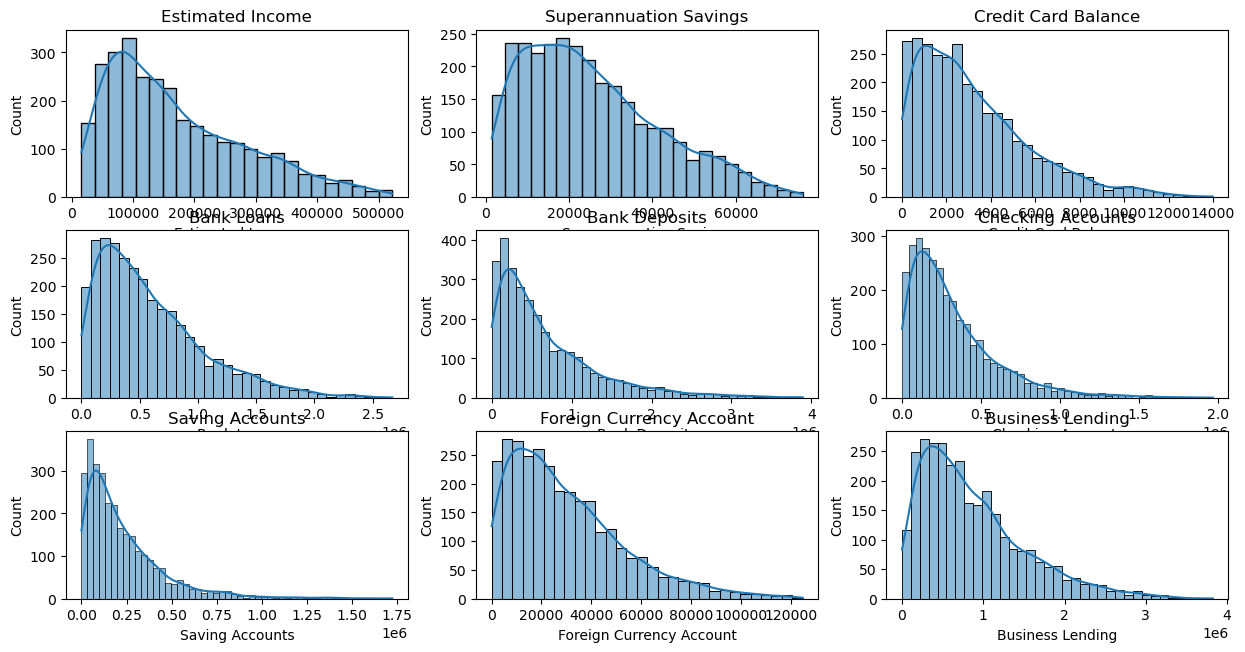

In [26]:
numerical_cols = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending']

# Univariate analysis and visualization
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
  plt.subplot(4,3,i+1)
  sns.histplot(df[col],kde=True)
  plt.title(col)
plt.show()

## Heatmaps

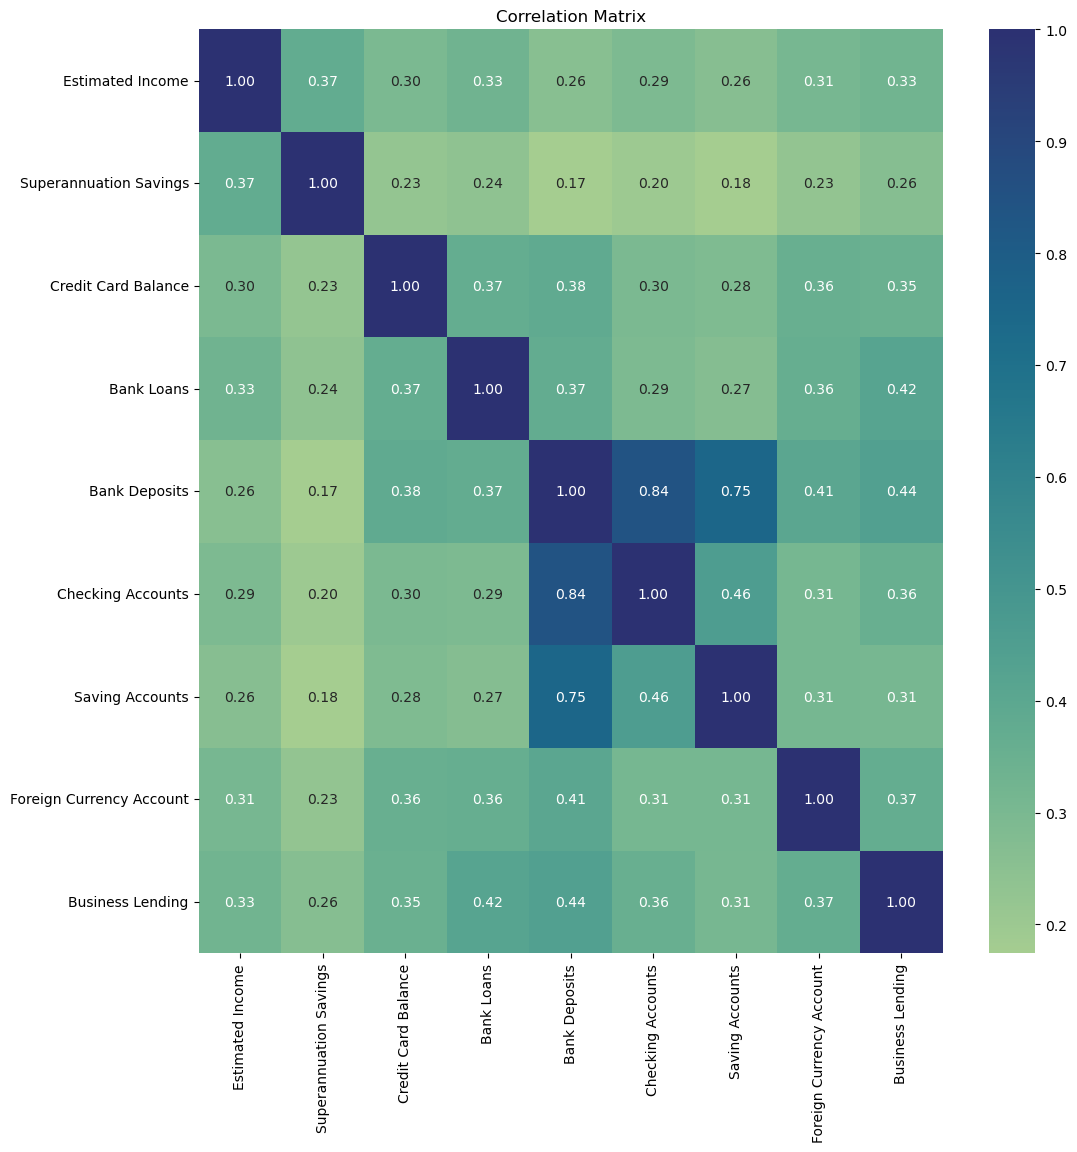

In [27]:
numerical_cols = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Segmenting customers to predict Loan default Risk:

In [39]:
# Clustering customer based on Risk of Loan default
numerical_cols = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance',
                  'Bank Loans', 'Bank Deposits', 'Checking Accounts',
                  'Saving Accounts', 'Foreign Currency Account', 'Business Lending']

X = df[numerical_cols]


In [30]:
# standardizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


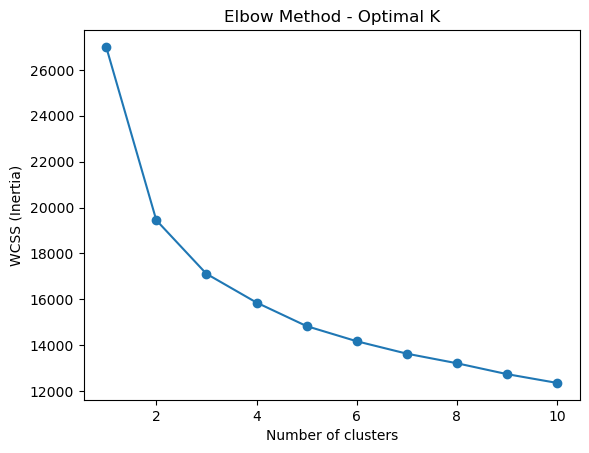

In [40]:
# Finding optimal number of clusters 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()

In [32]:
# Applying Kmeans based on the elbow at k = 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [42]:
# Visualising clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]


In [34]:
cluster_summary = df.groupby('Cluster')[numerical_cols].mean().round(2)
cluster_summary


,Estimated Income,Superannuation Savings,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending
Cluster,,,,,,,,,
0,233121.34,34702.03,4145.69,763347.66,638315.92,327239.06,229732.64,38050.13,1104273.64
1,109508.97,17709.44,1949.94,366719.95,353811.27,191903.67,139333.82,18355.67,533469.36
2,245937.88,31681.34,5287.36,992041.17,1915586.07,778707.10,583057.08,52051.18,1504226.98


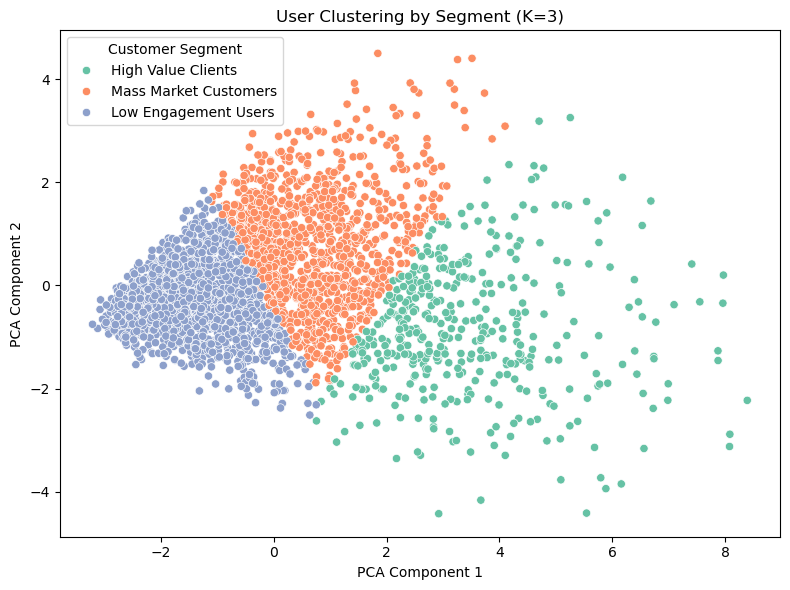

In [44]:
# Mapping numeric cluster to label
cluster_labels = {
    0: 'Mass Market Customers',
    1: 'Low Engagement Users',
    2: 'High Value Clients'
}

df['Customer_Segment'] = df['Cluster'].map(cluster_labels)

# Plot with segment labels as hue
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='PCA1', y='PCA2',
    hue='Customer_Segment',
    palette='Set2'
)
plt.title('User Clustering by Segment (K=3)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Customer Segment')
plt.tight_layout()
plt.show()


C:\Users\ashut\AppData\Local\Temp\ipykernel_10824\1048463412.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Customer_Segment', palette='Pastel2')


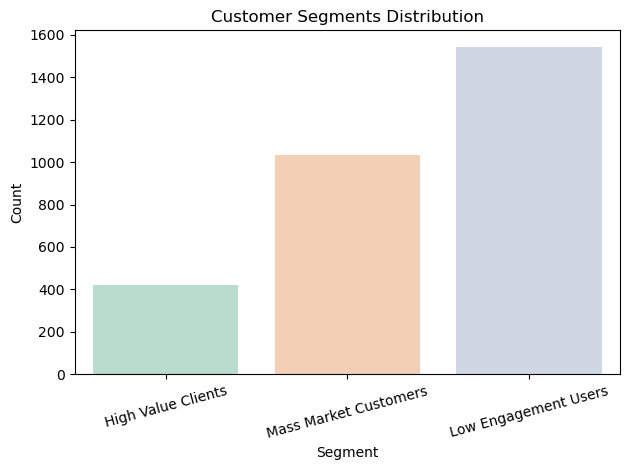

In [45]:
sns.countplot(data=df, x='Customer_Segment', palette='Pastel2')
plt.title('Customer Segments Distribution')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [47]:
df.to_csv('risk analysis (exported).csv', index = False)